In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ndarvind/phiusiil-phishing-url-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'phiusiil-phishing-url-dataset' dataset.
Path to dataset files: /kaggle/input/phiusiil-phishing-url-dataset


In [18]:
import os

dataset_path = "/kaggle/input/phiusiil-phishing-url-dataset"

In [19]:
files_in_dataset = os.listdir(dataset_path)

In [20]:
for file in files_in_dataset:
  print(file)
  print('*'*10)

PhiUSIIL_Phishing_URL_Dataset.csv
**********


In [22]:
df = pd.read_csv(os.path.join(dataset_path,"PhiUSIIL_Phishing_URL_Dataset.csv"))

In [23]:
df.shape

(235795, 55)

In [24]:
df.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


# COLUMN WISE INFORMATION

In [28]:
import pandas as pd

def dataframe_summary(df):
    summary = pd.DataFrame({
        "DataType": df.dtypes,
        "Non-Null Count": df.count(),
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "First Value": df.iloc[0],
        "Sample Values": df.apply(lambda x: x.unique()[:5])  # first 5 unique values
    })
    return summary

# Example usage
summary_table = dataframe_summary(df)
print(summary_table)


                           DataType  Non-Null Count  Missing Values  \
URL                          object          235795               0   
URLLength                     int64          235795               0   
Domain                       object          235795               0   
DomainLength                  int64          235795               0   
IsDomainIP                    int64          235795               0   
TLD                          object          235795               0   
URLSimilarityIndex          float64          235795               0   
CharContinuationRate        float64          235795               0   
TLDLegitimateProb           float64          235795               0   
URLCharProb                 float64          235795               0   
TLDLength                     int64          235795               0   
NoOfSubDomain                 int64          235795               0   
HasObfuscation                int64          235795               0   
NoOfOb

In [29]:
df['label'].value_counts()

,count
label,
1,134850
0,100945


# Class Labels :
Label 1 corresponds to a legitimate URL, label 0 to a phishing URL



# Data Cleaning

In [31]:
df['URL'].isnull().sum()

np.int64(0)

In [32]:
df['URL'].duplicated().sum()

np.int64(425)

In [33]:
df = df.drop_duplicates(subset=['URL'])

1. Before dropping the duplicates the shape fo dataset was : (235795, 55)
2. After dropping the duplicates ------------------------- : (235370, 55)



In [36]:
df.shape

(235370, 55)

Although the data is little imbalance , we may do oversampling . But as we are going for deep learning , we may just adjust class weights.

In [38]:
df.dtypes

,0
URL,object
URLLength,int64
Domain,object
DomainLength,int64
IsDomainIP,int64
TLD,object
URLSimilarityIndex,float64
CharContinuationRate,float64
TLDLegitimateProb,float64
URLCharProb,float64


In [39]:
import pandas as pd

def dataframe_summary(df):
    summary = pd.DataFrame({
        "DataType": df.dtypes,
        "Non-Null Count": df.count(),
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "First Value": df.iloc[0],
        "Sample Values": df.apply(lambda x: x.unique()[:5])  # first 5 unique values
    })
    return summary

# Example usage
summary_table = dataframe_summary(df)
print(summary_table)

                           DataType  Non-Null Count  Missing Values  \
URL                          object          235370               0   
URLLength                     int64          235370               0   
Domain                       object          235370               0   
DomainLength                  int64          235370               0   
IsDomainIP                    int64          235370               0   
TLD                          object          235370               0   
URLSimilarityIndex          float64          235370               0   
CharContinuationRate        float64          235370               0   
TLDLegitimateProb           float64          235370               0   
URLCharProb                 float64          235370               0   
TLDLength                     int64          235370               0   
NoOfSubDomain                 int64          235370               0   
HasObfuscation                int64          235370               0   
NoOfOb

In [48]:
X = df.drop(columns =["URL","label"])
y = df['label']

# Relation between independent and dependent variables

URLSimilarityIndex       0.860342
HasSocialNet             0.783882
HasCopyrightInfo         0.743197
HasDescription           0.690011
IsHTTPS                  0.610253
DomainTitleMatchScore    0.584204
HasSubmitButton          0.578816
IsResponsive             0.548977
URLTitleMatchScore       0.538844
HasHiddenFields          0.507715
dtype: float64


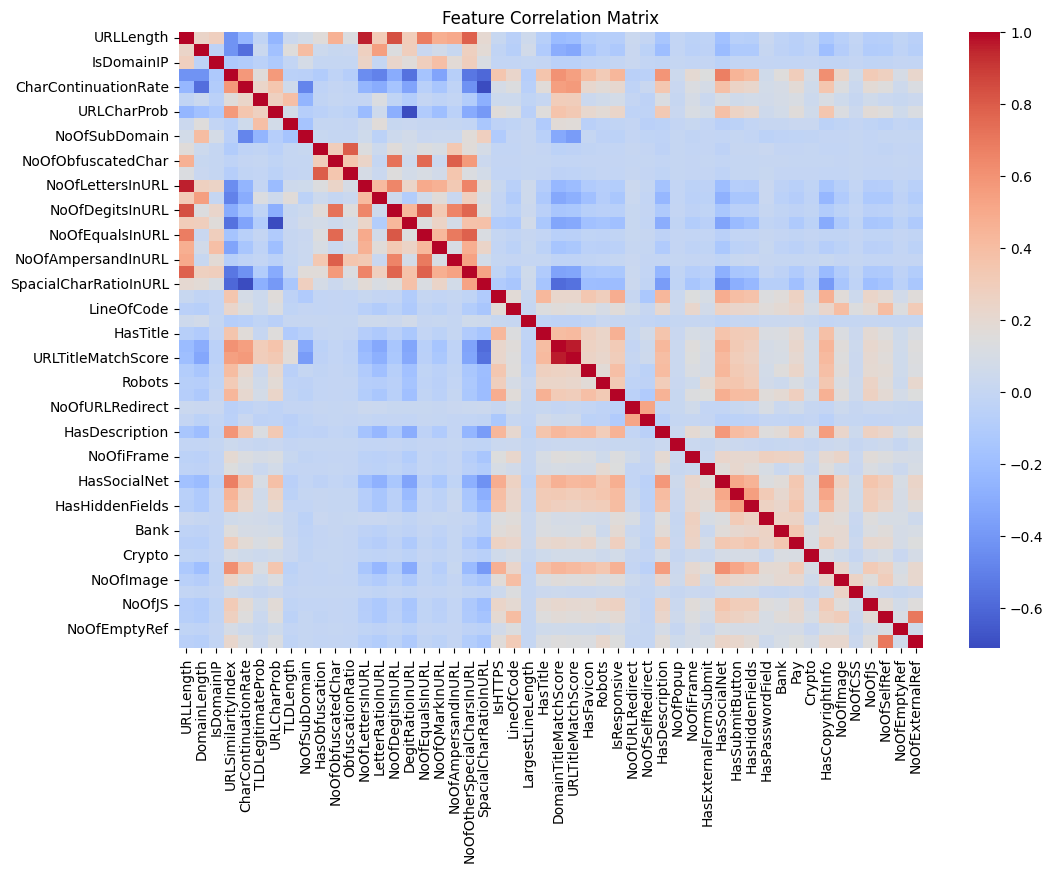

In [54]:
numeric_features = X.select_dtypes(include=['int64', 'float64'])

# Compute correlation with target
corr = numeric_features.corrwith(y)

# Show top 10 features most correlated
print(corr.sort_values(ascending=False).head(10))

# Optional: heatmap of all correlations
plt.figure(figsize=(12,8))
sns.heatmap(numeric_features.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [55]:
# Example: check counts per category for the label
pd.crosstab(X['TLD'], y)


label,0,1
TLD,,
100,1,0
101,2,0
103,24,0
106,5,0
107,1,0
...,...,...
yt,2,0
za,131,377
zm,4,9


In [56]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(pd.crosstab(X['TLD'], y))
print("p-value:", p)


p-value: 0.0


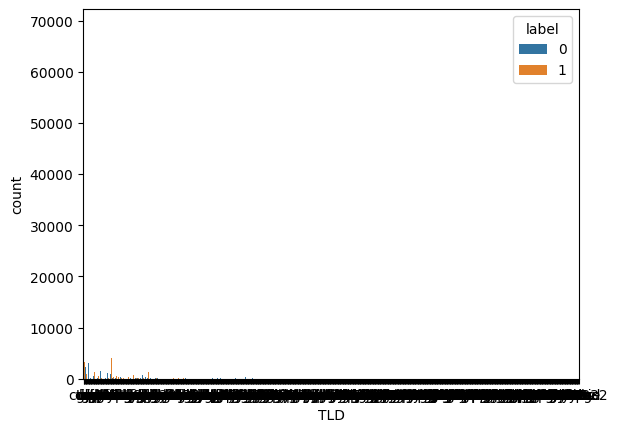

In [57]:
sns.countplot(x='TLD', hue=y, data=X.join(y))
plt.show()


In [63]:
object_features = df.select_dtypes(include=['object'])

object_features.nunique()


,0
URL,235370
Domain,220086
TLD,695
Title,197782


In [64]:
X = X.drop(columns =['Domain','Title'])

In [65]:
common = ['com', 'net', 'org']
country_codes = ['uk', 'in', 'us', 'de', 'fr']  # add more if you want

def tld_group(tld):
    if tld in common:
        return 'common'
    elif tld in country_codes:
        return 'country'
    else:
        return 'rare'

X['TLD_group'] = X['TLD'].apply(tld_group)
X = pd.get_dummies(X, columns=['TLD_group'])
X = X.drop(columns=['TLD'])  # drop original


In [66]:
X

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,TLD_group_common,TLD_group_country,TLD_group_rare
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,1,34,20,28,119,0,124,True,False,False
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,1,50,9,8,39,0,217,False,True,False
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,1,10,2,7,42,2,5,False,True,False
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,1,3,27,15,22,1,31,True,False,False
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,244,15,34,72,1,85,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,...,1,51,7,21,187,2,191,True,False,False
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,...,0,50,1,7,88,0,31,False,True,False
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,...,1,27,10,30,58,2,67,False,False,True
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,...,0,0,0,3,0,0,0,False,False,True


In [67]:
X.dtypes

,0
URLLength,int64
DomainLength,int64
IsDomainIP,int64
URLSimilarityIndex,float64
CharContinuationRate,float64
TLDLegitimateProb,float64
URLCharProb,float64
TLDLength,int64
NoOfSubDomain,int64
HasObfuscation,int64


We are gonna do k-fold stratified classification..

# Model build:

Step 1: Stratified K-Fold Initialization

In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier

In [43]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Step 2: Model Initialization


In [41]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)


Step 3: Loop Through Folds

In [70]:
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

In [71]:
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:44:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:44:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:44:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:44:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:44:47] WARNING: /w

In [72]:
print("✅ XGBoost with Stratified 5-Fold CV")
print(f"Accuracy:  {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")

✅ XGBoost with Stratified 5-Fold CV
Accuracy:  1.0000 ± 0.0000
F1 Score:  1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall:    1.0000 ± 0.0000


In [73]:
for col in X.columns:
    correlation = X[col].corr(y)
    if abs(correlation) > 0.99:  # suspiciously high
        print(col, correlation)

# Only using normal train_test_split:

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [77]:
model1 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [78]:
model1.fit(X_train1,y_train1)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:50:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [79]:
y_pred1 = model.predict(X_test1)

In [80]:
accuracy_score1 = accuracy_score(y_test1, y_pred1)

In [81]:
accuracy_score1

1.0

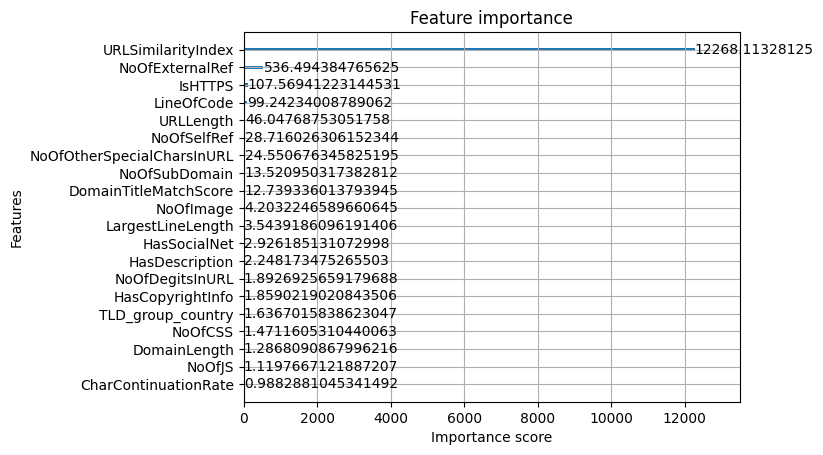

In [82]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=20, importance_type='gain')
plt.show()


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

In [91]:
model_rf = rf_model.fit(X_train1,y_train1)

In [92]:
y_pred_rf = model_rf.predict(X_test1)

In [93]:
accuracy_rf = accuracy_score(y_test1, y_pred_rf)

In [94]:
accuracy_rf

0.9999575137018312

In [104]:
rf_model2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

In [105]:
model_rf_2 = rf_model2.fit(X_train1,y_train1)

In [106]:
y_pred_rf_2 = model_rf_2.predict(X_test1)

In [107]:
accuracy_rf2 = accuracy_score(y_pred_rf_2,y_test1)

In [108]:
accuracy_rf2

0.9999787568509155

In [109]:
print("f1_score :",f1_score(y_test1, y_pred_rf_2))
print("recall :",recall_score(y_test1, y_pred_rf_2))
print("precision :",precision_score(y_test1, y_pred_rf_2))

f1_score : 0.9999814612261545
recall : 1.0
precision : 0.9999629231396685


In [110]:
for col in X.columns:
    print(col, X[col].nunique())

URLLength 482
DomainLength 101
IsDomainIP 2
URLSimilarityIndex 36350
CharContinuationRate 898
TLDLegitimateProb 465
URLCharProb 227293
TLDLength 12
NoOfSubDomain 10
HasObfuscation 2
NoOfObfuscatedChar 20
ObfuscationRatio 146
NoOfLettersInURL 421
LetterRatioInURL 709
NoOfDegitsInURL 182
DegitRatioInURL 575
NoOfEqualsInURL 25
NoOfQMarkInURL 5
NoOfAmpersandInURL 31
NoOfOtherSpecialCharsInURL 74
SpacialCharRatioInURL 240
IsHTTPS 2
LineOfCode 10738
LargestLineLength 26178
HasTitle 2
DomainTitleMatchScore 152
URLTitleMatchScore 497
HasFavicon 2
Robots 2
IsResponsive 2
NoOfURLRedirect 2
NoOfSelfRedirect 2
HasDescription 2
NoOfPopup 115
NoOfiFrame 119
HasExternalFormSubmit 2
HasSocialNet 2
HasSubmitButton 2
HasHiddenFields 2
HasPasswordField 2
Bank 2
Pay 2
Crypto 2
HasCopyrightInfo 2
NoOfImage 992
NoOfCSS 209
NoOfJS 253
NoOfSelfRef 1374
NoOfEmptyRef 296
NoOfExternalRef 1191
TLD_group_common 2
TLD_group_country 2
TLD_group_rare 2


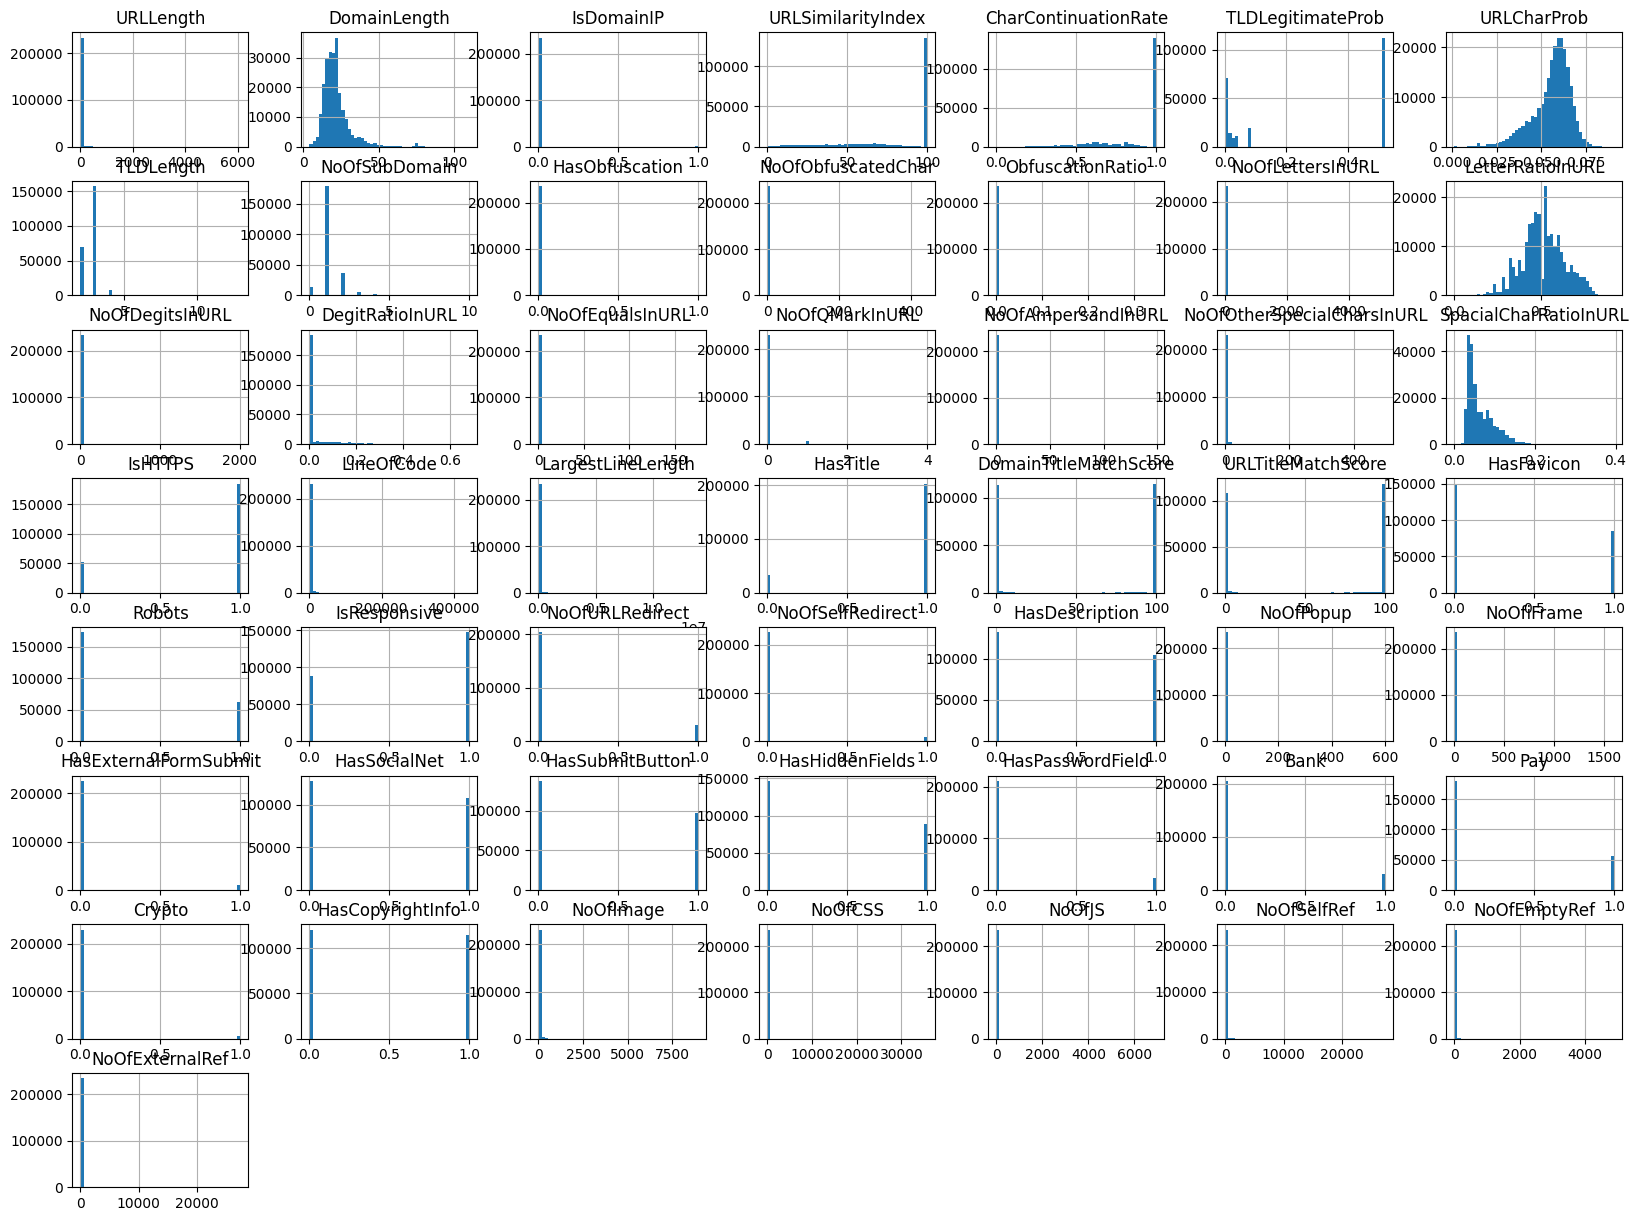

In [111]:
X.hist(figsize=(20,15), bins=50)
plt.show()


In [112]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()
corr_matrix.style.background_gradient(cmap='RdYlGn')

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.242441,0.277893,-0.420684,-0.240603,-0.016422,-0.244891,0.033132,0.070967,0.162224,0.459302,0.127554,0.956046,0.312243,0.835966,0.304306,0.685432,0.475288,0.500625,0.782596,0.199002,0.013032,-0.060477,0.045447,-0.075290,-0.215467,-0.192809,-0.094272,-0.073629,-0.082409,0.029736,-0.005043,-0.148791,-0.010922,-0.044731,-0.035330,-0.180515,-0.067588,-0.072456,0.020989,-0.031552,-0.057769,-0.025085,-0.126092,-0.064468,-0.014468,-0.078432,-0.074519,-0.023172,-0.058890,-0.233060
DomainLength,0.242441,1.000000,-0.041381,-0.420029,-0.576411,0.027724,-0.177169,0.151645,0.398950,0.041511,0.011333,0.021661,0.276907,0.548341,0.131175,0.289062,0.020177,0.064773,0.016375,0.272481,0.182876,-0.019543,-0.074982,0.067099,-0.107292,-0.296132,-0.328140,-0.148169,-0.082586,-0.119626,0.018795,-0.046765,-0.202439,-0.012478,-0.051454,-0.038383,-0.215515,-0.111303,-0.111816,0.008449,-0.039727,-0.065798,-0.034714,-0.196531,-0.083255,-0.017542,-0.101973,-0.096474,-0.031607,-0.069876,-0.282643
IsDomainIP,0.277893,-0.041381,1.000000,-0.121711,-0.101431,-0.053200,-0.111519,-0.011065,0.084622,0.001257,0.000356,0.000987,0.244944,-0.002098,0.225053,0.161080,0.288814,0.390329,0.179102,0.286519,0.115499,-0.011472,-0.016232,0.002257,-0.004709,-0.052084,-0.054503,-0.030881,-0.028444,-0.006665,0.023630,-0.010227,-0.021823,-0.002794,-0.009736,-0.007984,-0.046477,-0.011585,-0.012074,-0.008363,-0.015696,-0.013831,-0.006452,-0.022932,-0.016510,-0.004151,-0.023149,-0.019010,-0.006793,-0.015277,-0.060289
URLSimilarityIndex,-0.420684,-0.420029,-0.121711,1.000000,0.572536,0.161680,0.571363,-0.053629,-0.058706,-0.100259,-0.032319,-0.079071,-0.448624,-0.491112,-0.299383,-0.561288,-0.161480,-0.342523,-0.075506,-0.539977,-0.604664,0.347252,0.230906,-0.078579,0.352612,0.603445,0.543461,0.402180,0.313210,0.433750,-0.060623,-0.050064,0.590042,0.041004,0.190988,0.139053,0.673349,0.448760,0.404780,0.062889,0.151100,0.291636,0.087250,0.613499,0.235475,0.057621,0.315402,0.271287,0.091494,0.221709,0.860342
CharContinuationRate,-0.240603,-0.576411,-0.101431,0.572536,1.000000,0.237321,0.349520,0.052411,-0.482611,-0.036295,-0.004392,-0.021346,-0.252140,-0.303558,-0.158221,-0.343617,-0.068752,-0.145833,-0.034982,-0.425095,-0.711704,0.089467,0.133087,-0.068522,0.164561,0.550716,0.568222,0.212683,0.177068,0.206603,-0.031851,0.018885,0.340298,0.021230,0.126936,0.085850,0.380101,0.245226,0.219897,0.075699,0.095671,0.179066,0.059683,0.345037,0.135646,0.027864,0.183556,0.147539,0.049873,0.121463,0.467162
TLDLegitimateProb,-0.016422,0.027724,-0.053200,0.161680,0.237321,1.000000,0.274158,0.387291,-0.250387,-0.016448,0.001218,-0.010921,-0.004535,0.129177,-0.029108,-0.091010,-0.009406,-0.036119,-0.011249,-0.094072,-0.280434,0.043769,0.041603,-0.024863,0.005543,0.298736,0.296441,0.033205,0.058179,0.081388,-0.008146,-0.037005,0.119000,0.005280,0.093229,0.027255,0.097716,0.062935,0.075502,0.070560,0.085445,0.111581,0.038680,0.114353,0.053386,0.008280,0.058408,0.028130,0.015231,0.033122,0.097229
URLCharProb,-0.244891,-0.177169,-0.111519,0.571363,0.349520,0.274158,1.000000,0.070605,-0.081569,-0.056126,-0.029067,-0.044656,-0.214440,0.045906,-0.290225,-0.708478,-0.103562,-0.193664,-0.055294,-0.306748,-0.396971,0.161387,0.124698,-0.058621,0.157080,0.360909,0.330762,0.215932,0.1

In [113]:
correlation_with_target = corr_matrix["label"].drop("label") #extracts the column of correlations between all features and the target variable (label)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 URLLength                    -0.233060
DomainLength                 -0.282643
IsDomainIP                   -0.060289
URLSimilarityIndex            0.860342
CharContinuationRate          0.467162
TLDLegitimateProb             0.097229
URLCharProb                   0.469521
TLDLength                    -0.078973
NoOfSubDomain                -0.006356
HasObfuscation               -0.052522
NoOfObfuscatedChar           -0.015345
ObfuscationRatio             -0.041954
NoOfLettersInURL             -0.257626
LetterRatioInURL             -0.366970
NoOfDegitsInURL              -0.177755
DegitRatioInURL              -0.431896
NoOfEqualsInURL              -0.077165
NoOfQMarkInURL               -0.176027
NoOfAmpersandInURL           -0.034698
NoOfOtherSpecialCharsInURL   -0.358268
SpacialCharRatioInURL        -0.533003
IsHTTPS                       0.610253
LineOfCode                    0.271970
LargestLineLength            -0.040974
HasTitle                      0.460337

In [114]:
# Identify features with low correlation to the target (e.g., abs(correlation) < 0.5)
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.5].index.tolist()

#abs() method in Python is used to calculate the absolute value of numbers. In the context of a Pandas Series or DataFrame, it
#computes the absolute value of each element, ensuring all values are non-negative.

print("Low correlation features:", low_correlation_features)

Low correlation features: ['URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


In [124]:
new_X = df.drop(columns= ['URL','Domain','Title','URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef','label'])

In [117]:
new_y = df['label']

In [125]:
new_X.dtypes

,0
TLD,object
URLSimilarityIndex,float64
SpacialCharRatioInURL,float64
IsHTTPS,int64
DomainTitleMatchScore,float64
URLTitleMatchScore,float64
IsResponsive,int64
HasDescription,int64
HasSocialNet,int64
HasSubmitButton,int64


In [128]:
new_X['TLD'].nunique()

695

In [129]:
common = ['com', 'net', 'org']
country_codes = ['uk', 'in', 'us', 'de', 'fr']  # add more if you want

def tld_group(tld):
    if tld in common:
        return 'common'
    elif tld in country_codes:
        return 'country'
    else:
        return 'rare'

new_X['TLD_group'] = new_X['TLD'].apply(tld_group)
new_X = pd.get_dummies(new_X, columns=['TLD_group'])
new_X = new_X.drop(columns=['TLD'])  # drop original

In [130]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    new_X, new_y, test_size=0.2, stratify=y, random_state=42
)

In [131]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [133]:
xgb_model = xgb_model.fit(X_train_xgb,y_train_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:59:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [134]:
y_pred_xgb = xgb_model.predict(X_test_xgb)

In [136]:
print("Accuracy : ",accuracy_score(y_test_xgb,y_pred_xgb))
print("F1-score : ",f1_score(y_test_xgb, y_pred_xgb))
print("Recall : ",recall_score(y_test_xgb,y_pred_xgb))
print("Precision : ",precision_score(y_test_xgb,y_pred_xgb))

Accuracy :  0.9998725411054935
F1-score :  0.9998887776665555
Recall :  1.0
Precision :  0.9997775800711743


In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [138]:
cm = confusion_matrix(y_pred_xgb, y_test_xgb)
print(cm)

[[20098     0]
 [    6 26970]]


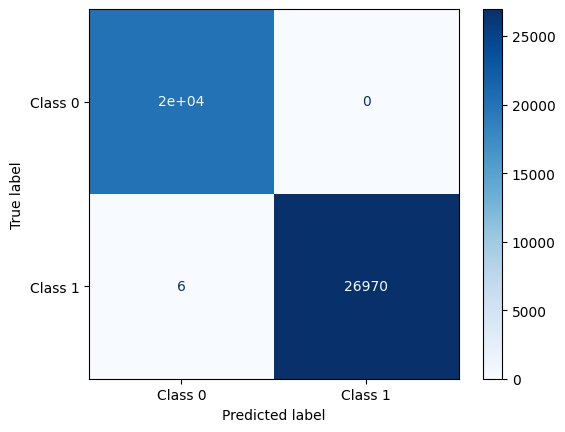

In [139]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)  # Optional: color map
plt.show()

In [140]:
X_test_xgb.shape

(47074, 14)

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

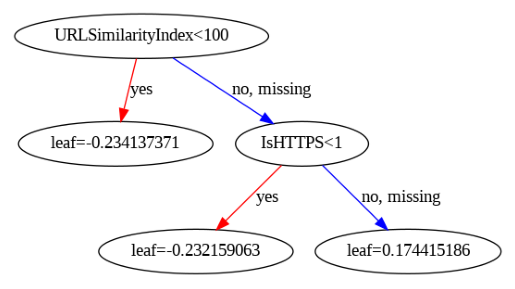

In [141]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Assuming your model is trained as `model`
plt.figure(figsize=(20,10))  # increase size for readability
plot_tree(xgb_model, num_trees=0)  # num_trees=0 means the first tree
plt.show()


<Figure size 1000x600 with 0 Axes>

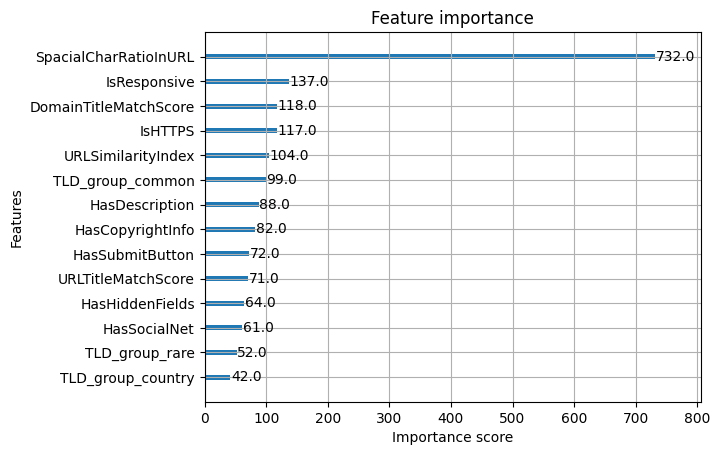

In [142]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type='weight')  # or 'gain', 'cover'
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


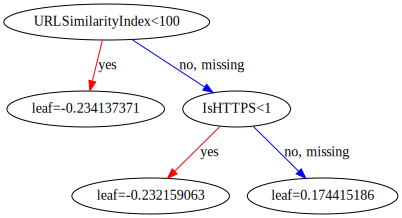

In [144]:
import xgboost as xgb

xgb.to_graphviz(xgb_model, num_trees=0)  # requires graphviz installed
